In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

In [9]:
df = pd.read_excel("premiums_rest.xlsx")

In [10]:
df['genetical_risk']=0 ### its added for people abovwer 25 as we do not have we have set to 0 to mantain consistency

In [11]:
df.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0


In [12]:
df.shape

(29904, 14)

In [13]:
df.columns = df.columns.str.replace(" ","_").str.lower()
####converting into snake_case convention 


In [14]:
df.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0


In [15]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           9
employment_status        1
income_level             9
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [16]:
df.dropna(inplace=True)
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [17]:
##### 1 handle na values

In [18]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [19]:
 ####handle duplicate 

In [20]:
df.duplicated().sum()

df.drop.duplicates(inplace=True)

AttributeError: 'function' object has no attribute 'duplicates'

In [ ]:
df.describe()##describing numeric columns age 356 anaomlay is detected ,so in dependants - 3value 

In [ ]:
df[df['number_of_dependants']<0]

In [ ]:
df[df['number_of_dependants']<0]['number_of_dependants'].unique()

In [ ]:
df['number_of_dependants'] = df['number_of_dependants'].abs()##changed negative values to positive 

In [ ]:
df.describe()

In [ ]:
###1. Numeric Columns
#Univariate Analysis: Numeric Columns
#Box plots for numeric columns in progress

In [ ]:
df.dtypes

In [21]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns  

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

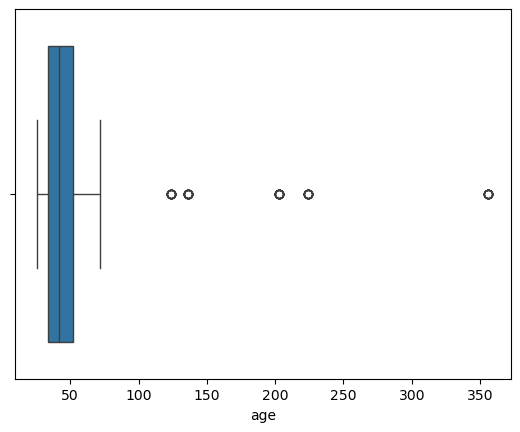

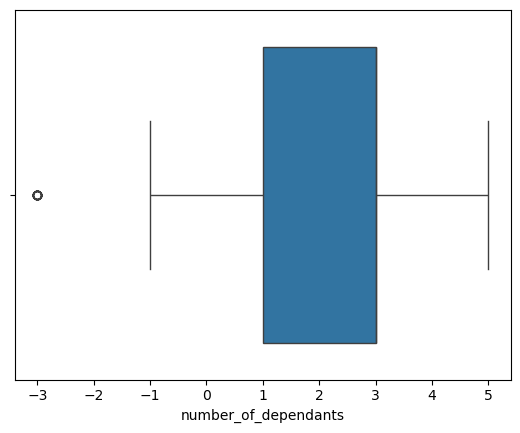

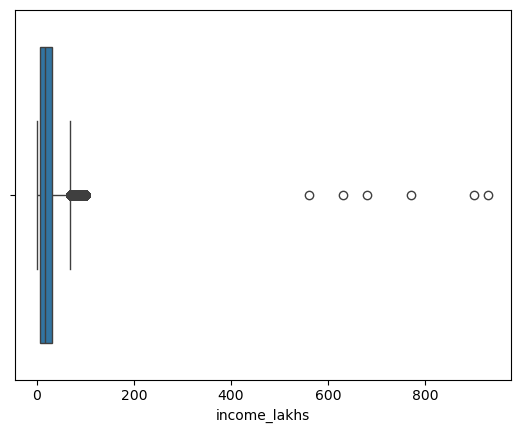

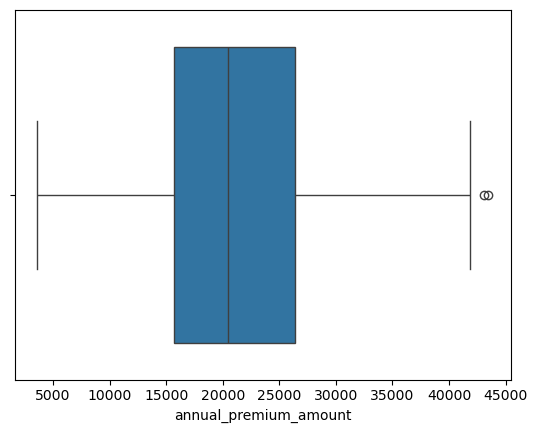

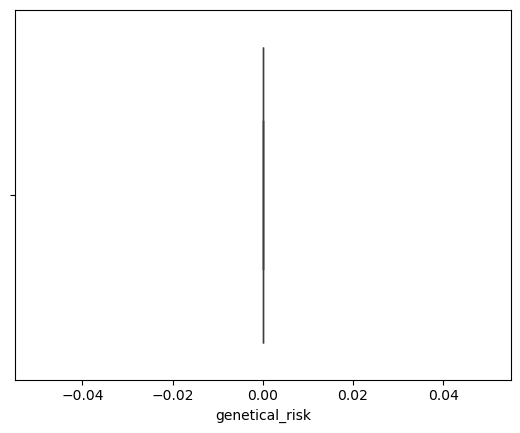

In [22]:
for col in numeric_columns:
    sns.boxplot(x=df[col])
    plt.show()


###ran a for loop for all numeric columns to see outliers 

Outlier Treatment: Age Column

In [23]:
df[df['age']>100]['age'].unique()

array([224, 124, 136, 203, 356], dtype=int64)

In [24]:
df1=df[df['age']<100].copy()

In [25]:
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29828.000000,29828.000000,29828.000000,29828.000000,29828.0
mean,43.095380,2.381755,23.371530,20901.900563,0.0
std,11.041991,1.430735,24.751262,6928.457636,0.0
min,26.000000,-3.000000,1.000000,6538.000000,0.0
25%,34.000000,1.000000,7.000000,15706.000000,0.0
50%,42.000000,3.000000,17.000000,20496.000000,0.0
75%,52.000000,3.000000,32.000000,26361.000000,0.0
max,72.000000,5.000000,930.000000,43471.000000,0.0


In [26]:
#Outlier Treatment: Income Column

In [27]:
# A function i used to treat upper bound and lower bound 

def get_iqr_bounds(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound


In [28]:
lower, upper = get_iqr_bounds(df1['income_lakhs'])
lower, upper

(-30.5, 69.5)

In [29]:
df1[df1.income_lakhs>upper].shape

(2090, 14)

In [30]:
#There are many legitimate records that we will get rid of if we use IQR bounds method.

In [31]:
quantile_thresold = df1.income_lakhs.quantile(0.999)
quantile_thresold

###100 lacs 1 crore

100.0

In [32]:
df1[df1.income_lakhs>quantile_thresold].shape

(6, 14)

In [33]:
df2 = df1[df1.income_lakhs<=quantile_thresold].copy()
df2.shape

(29822, 14)

In [34]:
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.0
mean,43.094896,2.381698,23.226343,20900.689223,0.0
std,11.042430,1.430740,22.455408,6928.192115,0.0
min,26.000000,-3.000000,1.000000,6538.000000,0.0
25%,34.000000,1.000000,7.000000,15705.250000,0.0
50%,42.000000,3.000000,17.000000,20495.500000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,72.000000,5.000000,100.000000,43471.000000,0.0


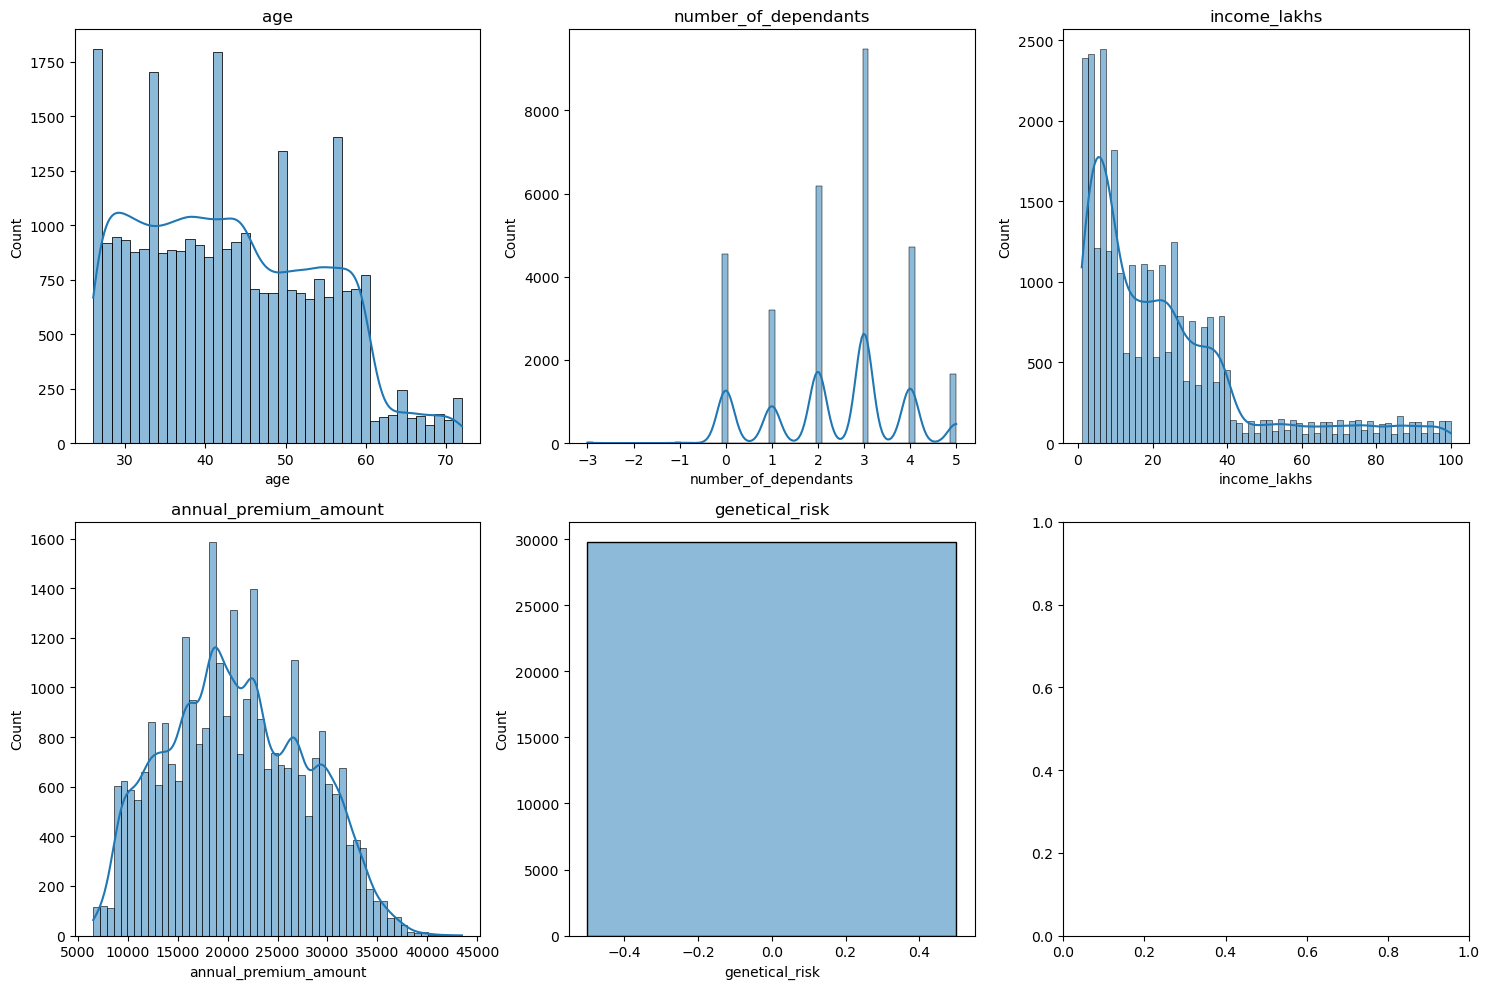

In [36]:
###checking distribution of columns using histogram
###df2 is outlier free

##UNIVARIATE


fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Adjust the size as necessary

for i, column in enumerate(numeric_columns):
    ax = axs[i//3, i%3]  # Determines the position of the subplot in the grid
    sns.histplot(df2[column], kde=True, ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

#Bivariate Analysis: Numeric Columns

In [37]:
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

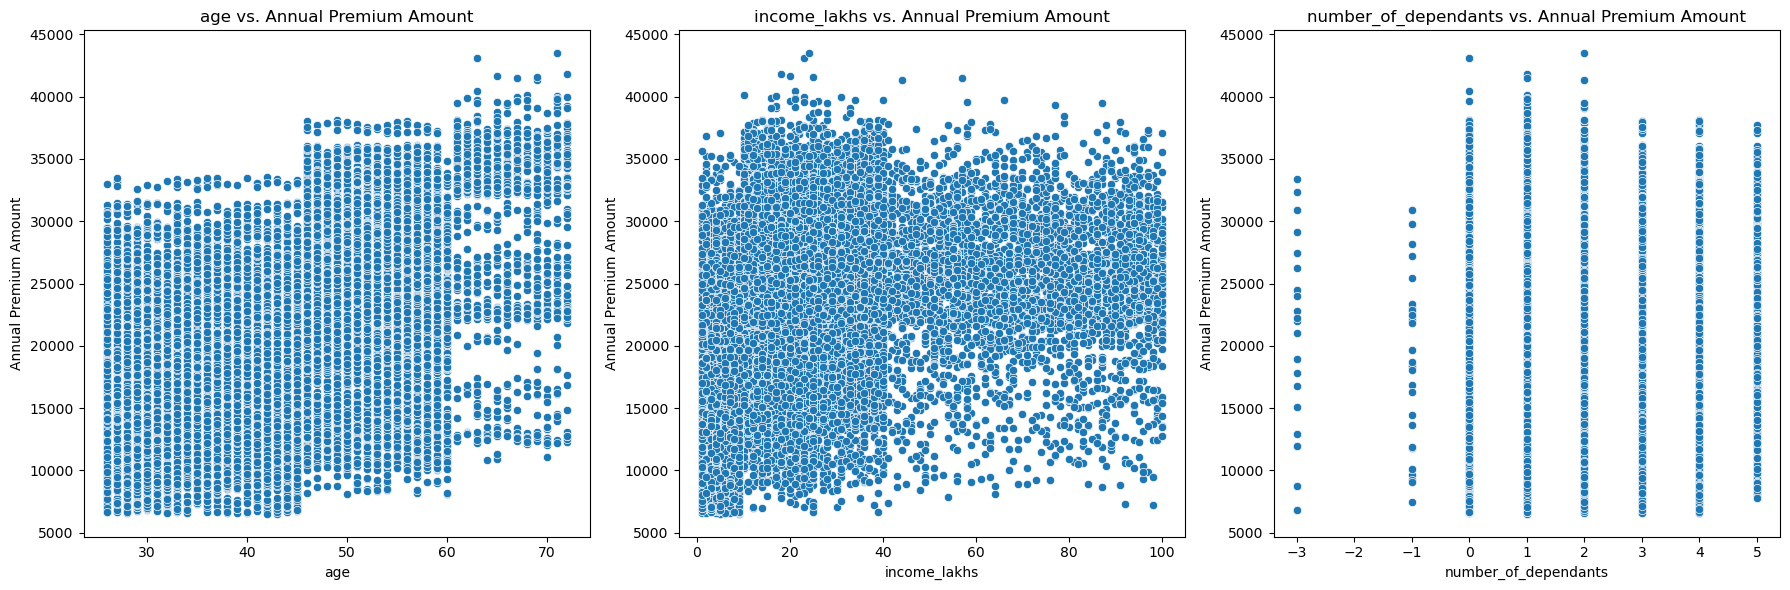

In [38]:
numeric_features = ['age', 'income_lakhs', 'number_of_dependants']

fig, axes = plt.subplots(1, len(numeric_features), figsize=(18, 6))  # Adjust figure size as necessary

for ax, column in zip(axes, numeric_features):
    sns.scatterplot(x=df2[column], y=df2['annual_premium_amount'], ax=ax)
    ax.set_title(f'{column} vs. Annual Premium Amount')
    ax.set_xlabel(column)
    ax.set_ylabel('Annual Premium Amount')

plt.tight_layout()  # Adjusting layout
plt.show()

#2.Categorical Columns

In [39]:
categorical_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status', 'income_level', 'medical_history', 'insurance_plan']
for col in categorical_cols:
    print(col, ":", df2[col].unique())


###issue in smoking 

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Does Not Smoke' 'Not Smoking'
 'Smoking=0']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']


In [40]:
df2['smoking_status'].replace({
    'Not Smoking': 'No Smoking',
    'Does Not Smoke': 'No Smoking',
    'Smoking=0': 'No Smoking'
}, inplace=True)


#changing smoking issue

C:\Users\Sushnato\AppData\Local\Temp\ipykernel_31088\3788967418.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace({


In [41]:
df2['smoking_status'].unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

In [42]:
pct_count = df2['gender'].value_counts(normalize=True)*100
pct_count

gender
Male      54.912481
Female    45.087519
Name: proportion, dtype: float64

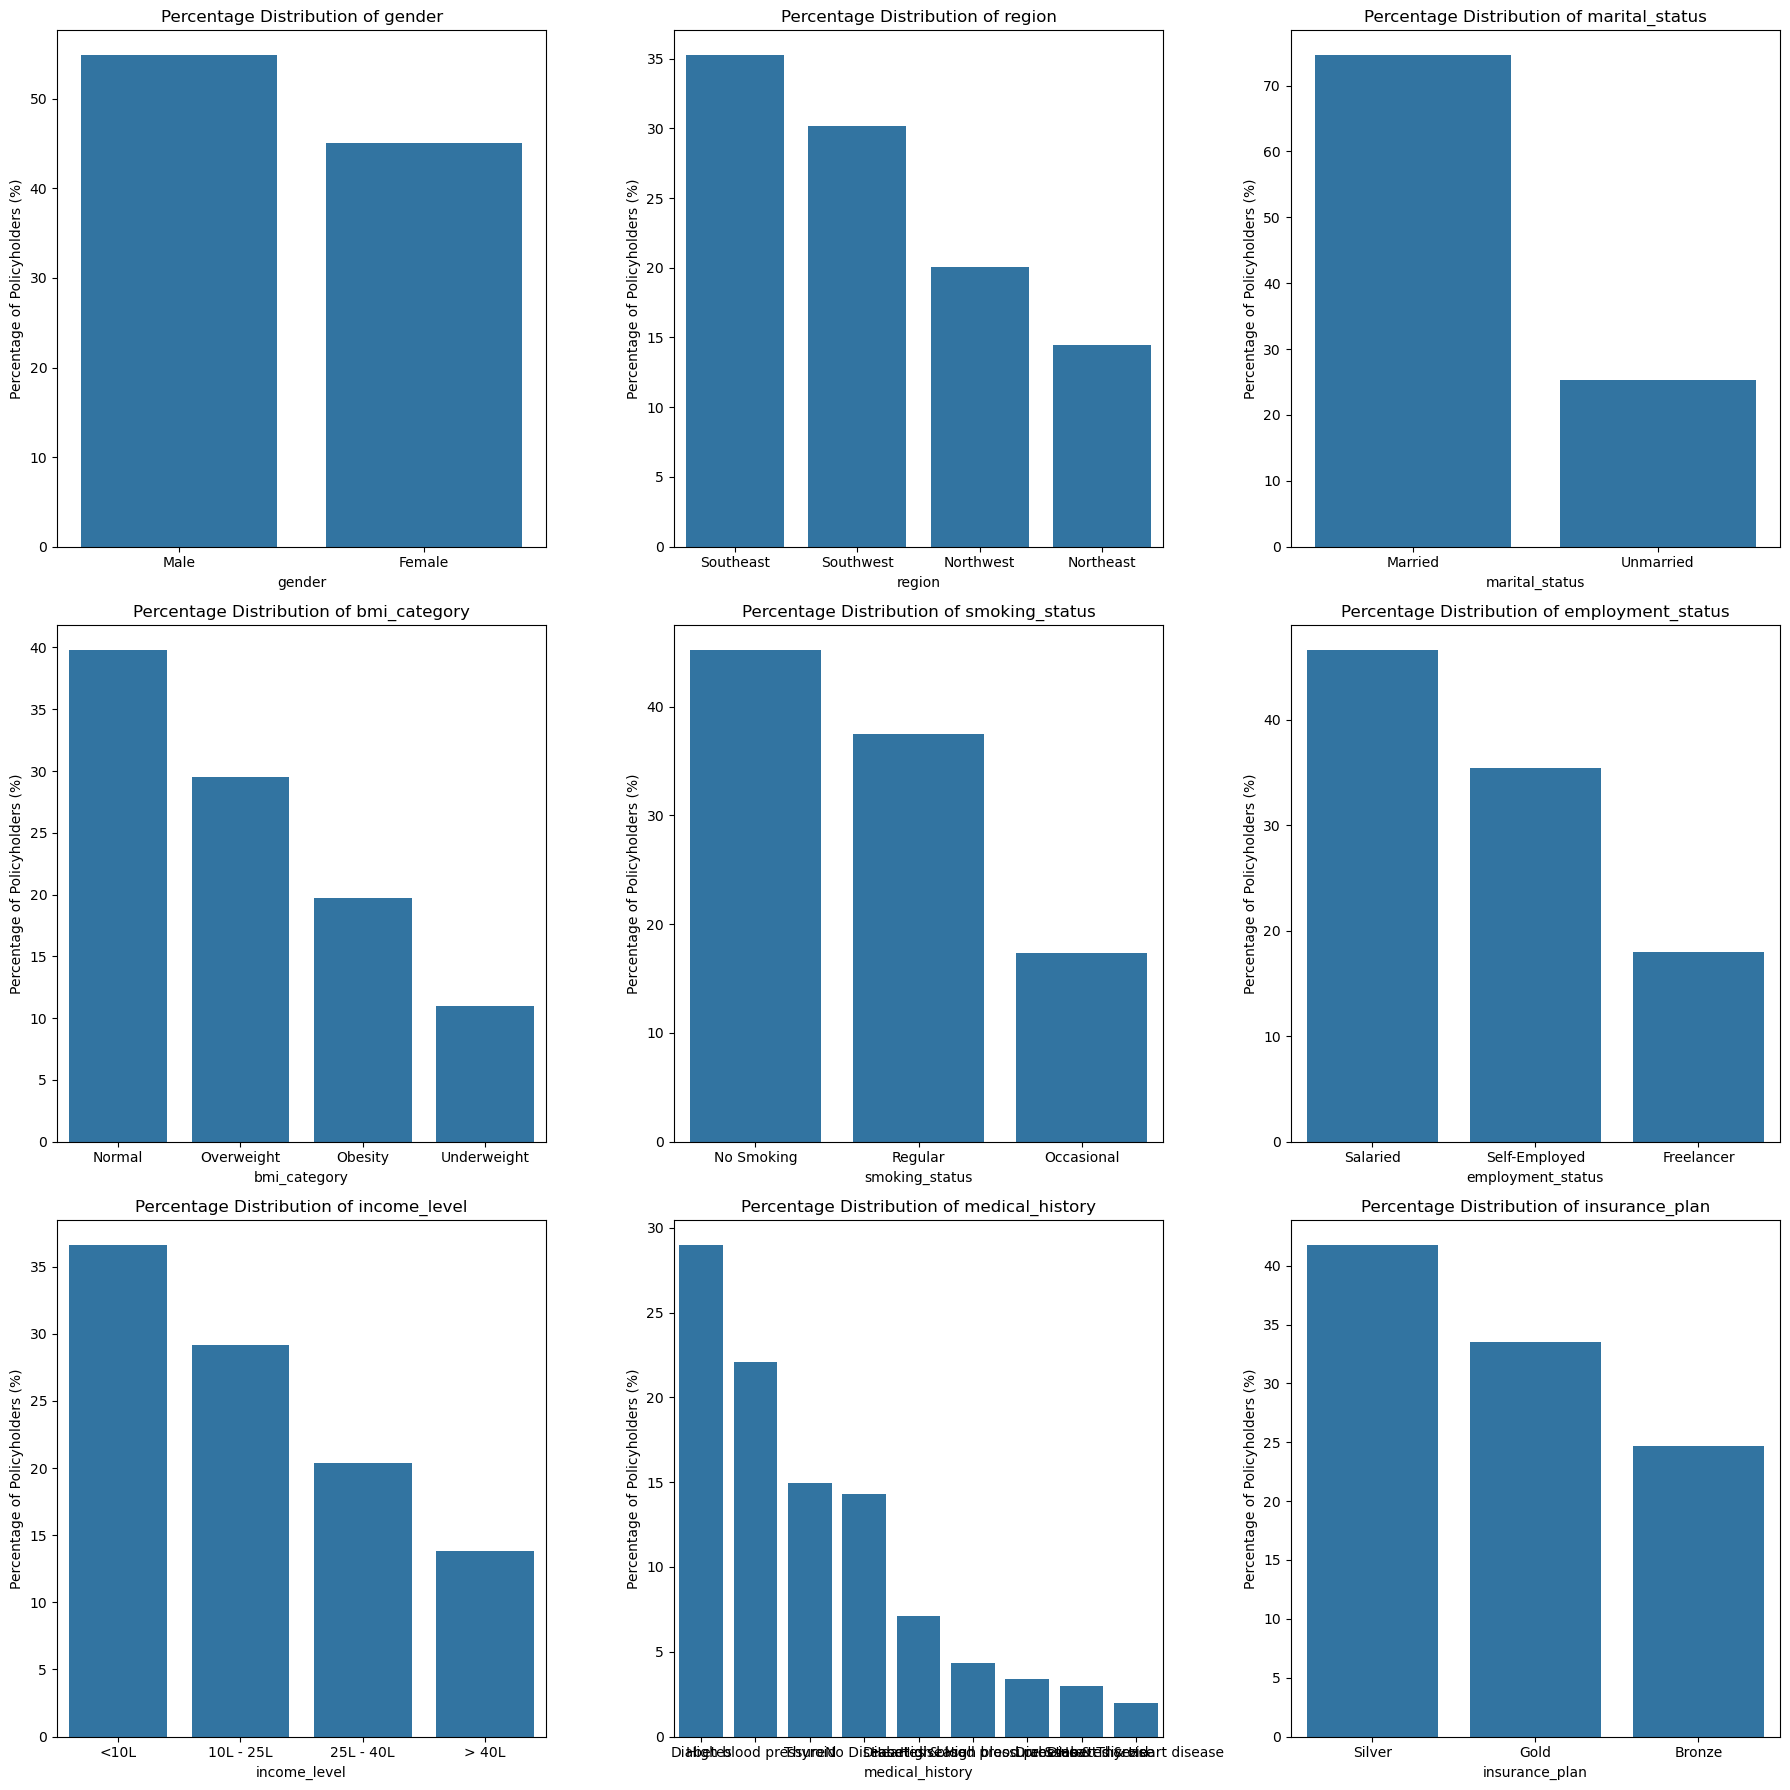

In [43]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))  
axes = axes.flatten()  # Flattening  the 2D array of axes into 1D for easier iteration

for ax, column in zip(axes, categorical_cols):
    # I am  Calculating  the percentage distribution of each category
    category_counts = df2[column].value_counts(normalize=True) * 100  # normalize=True will give the relative frequencies
    
    # Plotting the distribution using barplot
    sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax)
    ax.set_title(f'Percentage Distribution of {column}')
    ax.set_ylabel('Percentage of Policyholders (%)')
    ax.set_xlabel(column)  

plt.tight_layout()  
plt.show()

###fitting subplots

#Bivariate Analysis

In [44]:
# Cross-tabulation of gender and smoking status
crosstab = pd.crosstab(df2['income_level'], df2['insurance_plan'])
print(crosstab)



insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L          799  3554    4354
25L - 40L          301  2631    3142
<10L              6054   527    4341
> 40L              214  3287     618


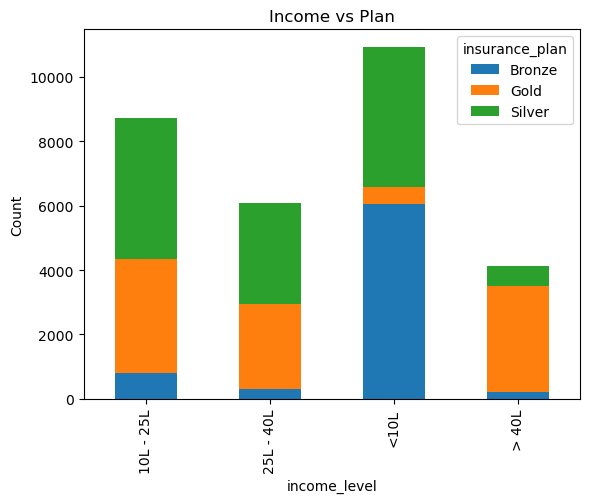

In [45]:
# Plotting the crosstab
crosstab.plot(kind='bar', stacked=True)
plt.title('Income vs Plan')
plt.ylabel('Count')
plt.show()

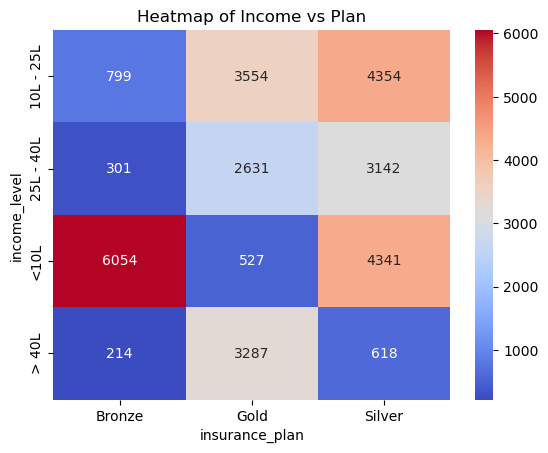

In [46]:
### I am trying another way of visulaization 
sns.heatmap(crosstab, annot=True, cmap='coolwarm',fmt="d")
plt.title('Heatmap of Income vs Plan')
plt.show()

### Feature Engineering

In [47]:
df2.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0


In [48]:
df2.medical_history.unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [49]:
# Defining the risk scores for each condition
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}

In [50]:

df2[['disease1', 'disease2']] = df2['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())



In [51]:
df2['total_risk_score'] = 0


In [52]:
df2.head(1)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0,diabetes,None,0


In [53]:
df2['disease1'].fillna('none', inplace=True)


C:\Users\Sushnato\AppData\Local\Temp\ipykernel_31088\3673003852.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease1'].fillna('none', inplace=True)


In [54]:
df2['disease2'].fillna('none', inplace=True)

C:\Users\Sushnato\AppData\Local\Temp\ipykernel_31088\728003441.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease2'].fillna('none', inplace=True)


In [55]:
df2['total_risk_score'] = 0



In [56]:
## runnning a for lopp to add scores up

for disease in ['disease1', 'disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_scores)

In [57]:
# Normalize the risk score to a range of 0 to 1 Min MAX SCALER
max_score = df2['total_risk_score'].max()

In [58]:

min_score = df2['total_risk_score'].min()


In [59]:
df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)


In [60]:
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0,diabetes,none,6,0.428571


### Encode Text Columns

In [61]:
### dont run the cell giving error multiple times*** warning

df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze': 1, 'Silver': 2, 'Gold': 3})


In [62]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,1,9053,0,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,1,16339,0,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,2,18164,0,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,3,20303,0,no disease,none,0,0.000000
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,1,15610,0,diabetes,none,6,0.428571


In [63]:
df2['income_level'] = df2['income_level'].map({'<10L':1, '10L - 25L': 2, '25L - 40L':3, '> 40L':4})

### dont run the cell giving error multiple times*** warning

In [64]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,1,6,Diabetes,1,9053,0,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,1,6,Diabetes,1,16339,0,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,2,20,High blood pressure,2,18164,0,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,4,77,No Disease,3,20303,0,no disease,none,0,0.000000
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,2,14,Diabetes,1,15610,0,diabetes,none,6,0.428571


In [65]:
df2.income_level.unique()

array([1, 2, 4, 3], dtype=int64)

In [66]:
df2.head(1)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,1,6,Diabetes,1,9053,0,diabetes,none,6,0.428571


In [67]:
####ONe Hot emcoding 

nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']

In [68]:
### i do not wangt to have a true fase value buta 0 and 1 balue hence dtype int 

df3 = pd.get_dummies(df2, columns=nominal_cols, drop_first=True, dtype=int)


In [69]:
df3.head(3)

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,0,diabetes,none,...,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,Diabetes,1,16339,0,diabetes,none,...,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,High blood pressure,2,18164,0,high blood pressure,none,...,0,0,0,0,0,0,0,0,0,1


In [70]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29822 entries, 0 to 29903
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              29822 non-null  int64  
 1   number_of_dependants             29822 non-null  int64  
 2   income_level                     29822 non-null  int64  
 3   income_lakhs                     29822 non-null  int64  
 4   medical_history                  29822 non-null  object 
 5   insurance_plan                   29822 non-null  int64  
 6   annual_premium_amount            29822 non-null  int64  
 7   genetical_risk                   29822 non-null  int64  
 8   disease1                         29822 non-null  object 
 9   disease2                         29822 non-null  object 
 10  total_risk_score                 29822 non-null  int64  
 11  normalized_risk_score            29822 non-null  float64
 12  gender_Male            

In [71]:
## Dropping redudant coliumns

df4 = df3.drop(['medical_history','disease1', 'disease2', 'total_risk_score'], axis=1)


In [72]:
df4.head(1)      

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0


## Calculating VIF for Multicolinearity

In [73]:
df4.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'insurance_plan', 'annual_premium_amount', 'genetical_risk',
       'normalized_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

In [74]:
cm = df4.corr()


In [75]:
df4.head(2)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0


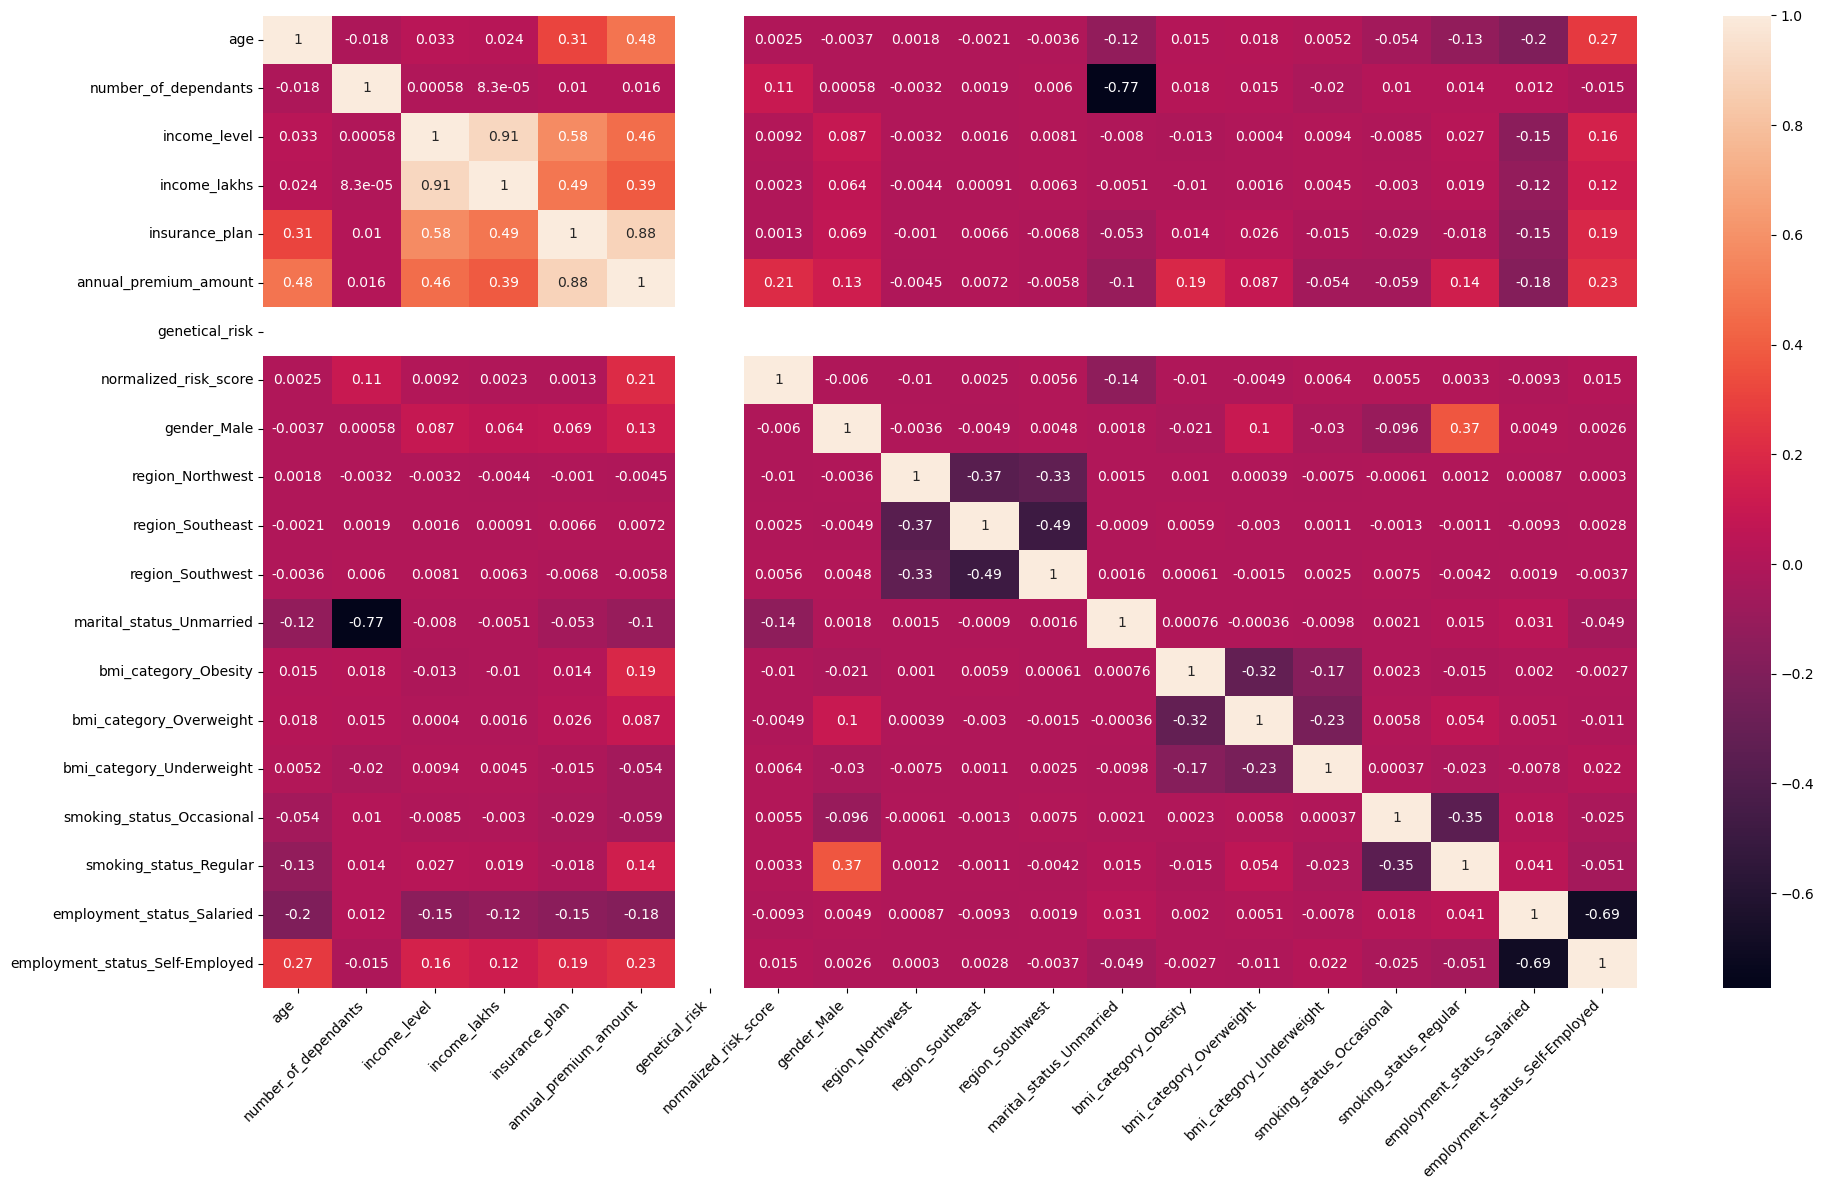

In [78]:

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [79]:
X = df4.drop('annual_premium_amount', axis='columns')


In [80]:
y = df4['annual_premium_amount']

In [81]:
### Added genetical risk in cols to scale also
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['age','number_of_dependants', 'income_level',  'income_lakhs', 'insurance_plan','genetical_risk']
scaler = MinMaxScaler()

In [82]:
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])


In [83]:
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.0,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000
mean,0.371628,0.672712,0.371225,0.224509,0.544112,0.0,0.426373,0.549125,0.200691,0.352693,0.301992,0.253336,0.196835,0.295051,0.110087,0.173228,0.374656,0.466132,0.354269
std,0.240053,0.178843,0.351111,0.226822,0.379009,0.0,0.240084,0.497589,0.400524,0.477816,0.459129,0.434929,0.397613,0.456073,0.313003,0.378450,0.484042,0.498860,0.478299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.500000,0.000000,0.060606,0.500000,0.0,0.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.347826,0.750000,0.333333,0.161616,0.500000,0.0,0.428571,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.565217,0.750000,0.666667,0.313131,1.000000,0.0,0.428571,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [85]:
def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [86]:
calculate_vif(X)

##If Vif is high drop them like threshold set by manager 

F:\anacondapython\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Column,VIF
0,age,4.014384
1,number_of_dependants,12.406363
2,income_level,13.892372
3,income_lakhs,11.189967
4,insurance_plan,5.288737
5,genetical_risk,NaN
6,normalized_risk_score,4.019906
7,gender_Male,2.612875
8,region_Northwest,2.257025
9,region_Southeast,3.214734


In [87]:
calculate_vif(X.drop('income_level',axis="columns"))
#I will drop it once at a time 


F:\anacondapython\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Column,VIF
0,age,3.953744
1,number_of_dependants,12.403149
2,income_lakhs,2.688065
3,insurance_plan,4.594752
4,genetical_risk,NaN
5,normalized_risk_score,4.018109
6,gender_Male,2.605451
7,region_Northwest,2.256542
8,region_Southeast,3.214104
9,region_Southwest,2.904261


In [88]:
## dropped the high income_levelcolumn	

X_reduced = X.drop('income_level', axis="columns")

## Model Training

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.30, random_state=10)


In [90]:

# shape of the X_train, X_test, y_train, y_test features
print("x train: ",X_train.shape)


x train:  (20875, 18)


In [91]:
print("x test: ",X_test.shape)


x test:  (8947, 18)


In [92]:
print("y train: ",y_train.shape)


y train:  (20875,)


In [93]:
print("y test: ",y_test.shape)

y test:  (8947,)


## Linear Regression Model ##

In [94]:
model_lr = LinearRegression()

In [95]:

model_lr.fit(X_train, y_train)


LinearRegression()

In [96]:
test_score = model_lr.score(X_test, y_test)
train_score = model_lr.score(X_train, y_train)


In [97]:
train_score, test_score

(0.9533644848238833, 0.9538420029628403)

In [98]:
y_pred = model_lr.predict(X_test)



In [99]:
mse_lr = mean_squared_error(y_test, y_pred)


In [100]:
rmse_lr = np.sqrt(mse_lr)
print("Linear Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

Linear Regression ==> MSE:  2183978.8398261797 RMSE:  1477.8290969615464


In [101]:
model_lr.intercept_

6652.73135440913

In [102]:

model_lr.coef_

array([ 7.02358766e+03, -2.01274866e+03, -7.06884745e+02,  1.48349286e+04,
        1.13686838e-13,  6.05540023e+03,  3.89499765e+01, -5.48823150e+01,
       -1.84195503e+01, -2.30657357e+01, -6.73202943e+02,  3.92582002e+03,
        1.97880666e+03,  6.15485126e+02,  8.35791943e+02,  2.79983483e+03,
       -4.50574362e+01,  2.43567549e+02])

In [103]:
feature_importance = model_lr.coef_

In [104]:
# Created a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])


In [105]:
# Sorting the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

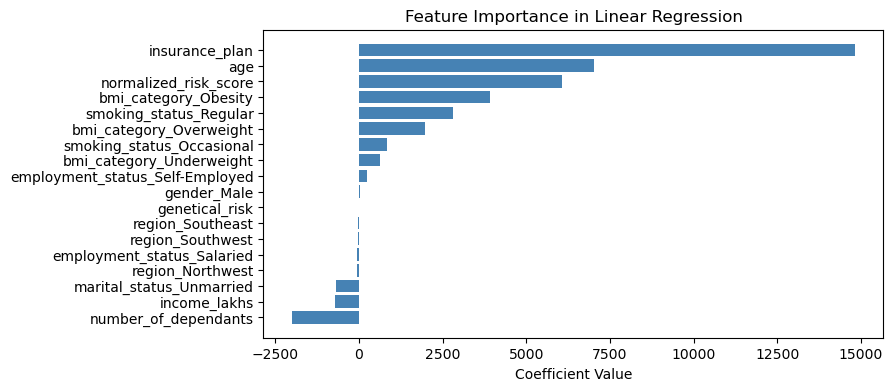

In [106]:

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

## Lets try different more methods to increase the R2 score

In [107]:
## Ridge Regression Model

In [108]:
model_rg = Ridge(alpha=1) #I can try with  different alpha regularization values



In [109]:

model_rg.fit(X_train, y_train)
test_score = model_rg.score(X_test, y_test)
train_score = model_rg.score(X_train, y_train)
train_score, test_score

(0.9533643083427492, 0.9538428660325248)

In [110]:
y_pred = model_rg.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("Ridge Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

Ridge Regression ==> MSE:  2183938.0034370543 RMSE:  1477.8152805533764


### Lets try XGBOOST

In [111]:
from xgboost import XGBRegressor



In [112]:
model_xgb = XGBRegressor(n_estimators=20, max_depth=3)

In [113]:
model_xgb.fit(X_train, y_train)
train_score = model_xgb.score(X_train, y_train)
test_score=model_xgb.score(X_test, y_test)




In [114]:
train_score, test_score

(0.9949295520782471, 0.9948463439941406)

In [115]:
y_pred = model_xgb.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("XGBoost Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

XGBoost Regression ==> MSE:  243847.75685001153 RMSE:  493.8094337393845


## Doing Random search 

In [116]:
model_xgb = XGBRegressor()
param_grid = {
    'n_estimators': [20, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=10, cv=3, scoring='r2', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
random_search.best_score_

0.9970577955245972

In [117]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [118]:
best_model = random_search.best_estimator_

In [119]:
feature_importance = best_model.feature_importances_

In [120]:

# Creating a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])


In [121]:

# Sorting the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

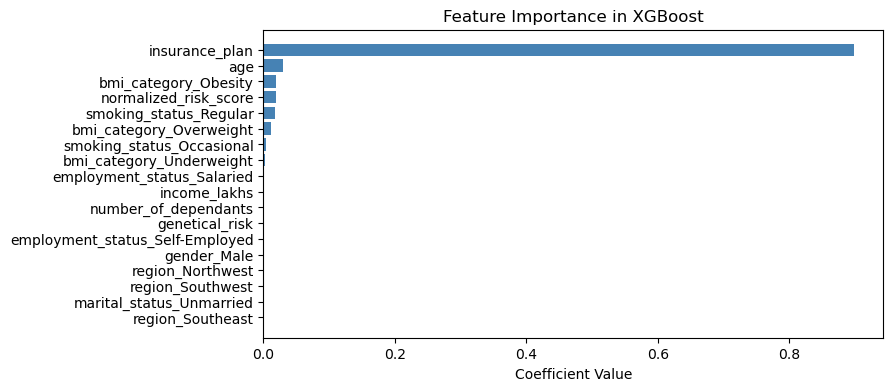

In [122]:

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in XGBoost')
plt.show()

In [123]:
### xg boost being a tree based model interpretation may not be that wasy compared to linear model where we can do direct math

In [124]:
y_pred = best_model.predict(X_test)

####MAPE 


In [125]:

residuals = y_pred - y_test
residuals_pct = (residuals / y_test) * 100



##  Doing Error Analysis

In [126]:

results_df = pd.DataFrame({
    'actual': y_test, 
    'predicted': y_pred, 
    'diff': residuals, 
    'diff_pct': residuals_pct
})
results_df.head()

,actual,predicted,diff,diff_pct
19713,26895,26691.470703,-203.529297,-0.756755
14750,22734,22650.751953,-83.248047,-0.366183
19932,21198,21581.894531,383.894531,1.810994
29643,9100,9425.934570,325.934570,3.581699
17076,26434,26691.470703,257.470703,0.974013


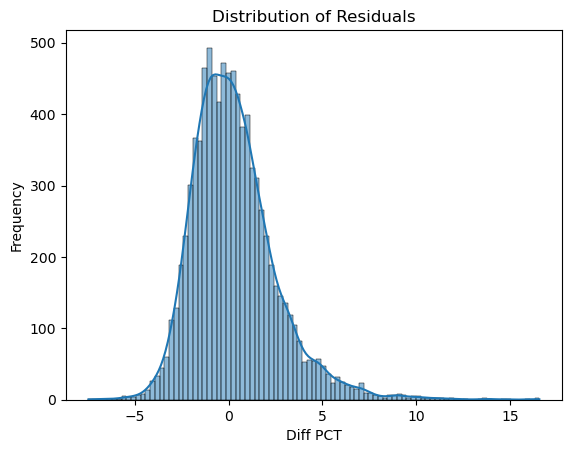

In [127]:
sns.histplot(results_df['diff_pct'], kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Diff PCT')
plt.ylabel('Frequency')
plt.show()

In [128]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)*100

1.6730919862131062

In [129]:
#### Even if mape is low for some premiums the differnce pct is way higher let me fix this 

In [130]:
# i have decided the difference pct should not be above 10 percent absolute terms

In [131]:
extreme_error_threshold = 10


In [132]:
extreme_results_df = results_df[np.abs(results_df['diff_pct']) > extreme_error_threshold]


In [133]:
extreme_results_df.head()

,actual,predicted,diff,diff_pct
14286,6845,7621.263672,776.263672,11.340594
27518,8502,9425.934570,923.934570,10.867261
9285,6872,7621.263672,749.263672,10.903138
7547,6538,7621.263672,1083.263672,16.568732
21910,6651,7621.263672,970.263672,14.588237


In [134]:
extreme_results_df.shape

(29, 4)

In [135]:
extreme_errors_pct = extreme_results_df.shape[0]*100/X_test.shape[0]


In [136]:
extreme_errors_pct ###For 30 percent customers approx we will over charge that is not good 

0.32413099362914943

In [137]:
extreme_results_df[abs(extreme_results_df.diff_pct)>50] ####549 severe error  like way above 50 percent whom we will overcharge or underchage by more than 50%

,actual,predicted,diff,diff_pct


In [138]:
extreme_results_df[abs(extreme_results_df.diff_pct)>50].sort_values("diff_pct",ascending=False)  #### most severe being 87 percent

,actual,predicted,diff,diff_pct


In [139]:
extreme_errors_df = X_test.loc[extreme_results_df.index]
extreme_errors_df.head(2) ### lets see where the error is hiding which group ,location age 

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
14286,0.021739,0.00,0.050505,0.0,0.0,0.000000,1,1,0,0,1,0,0,0,0,0,1,0
27518,0.304348,0.75,0.080808,0.0,0.0,0.357143,1,1,0,0,0,0,0,0,0,0,0,1


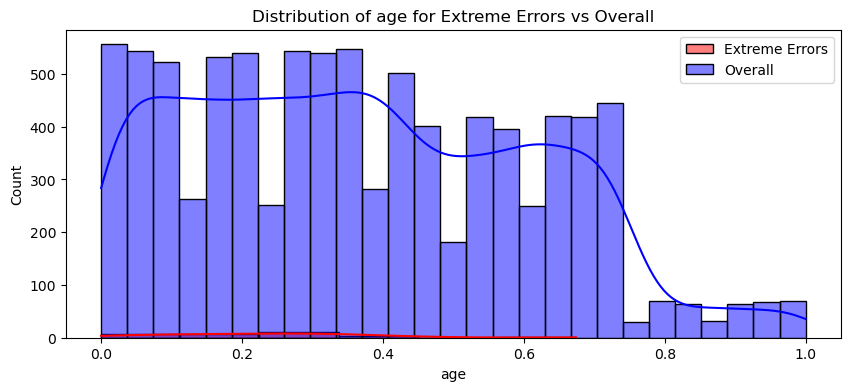

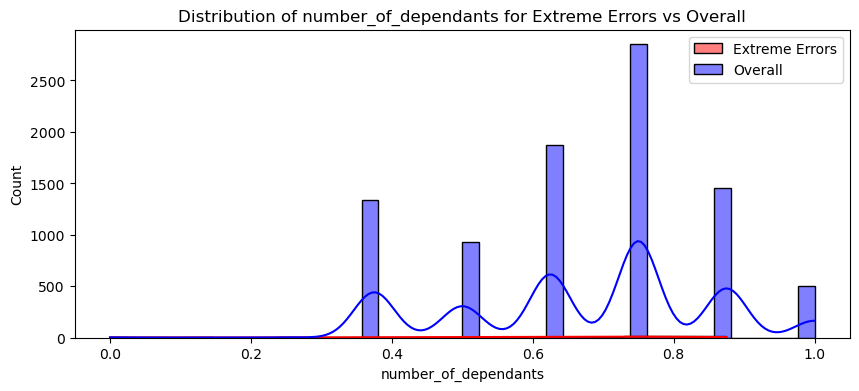

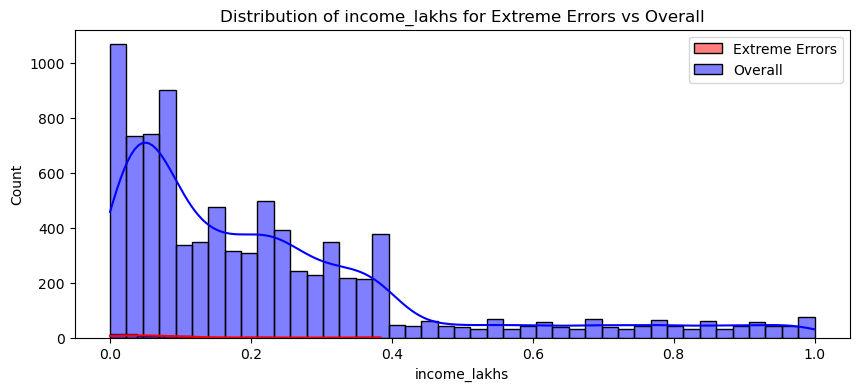

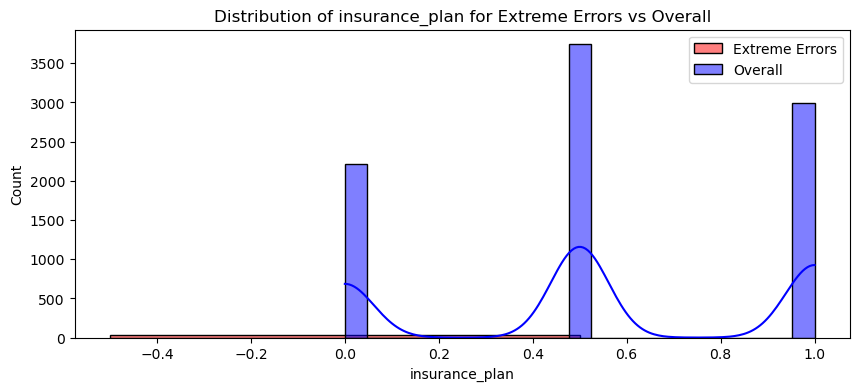

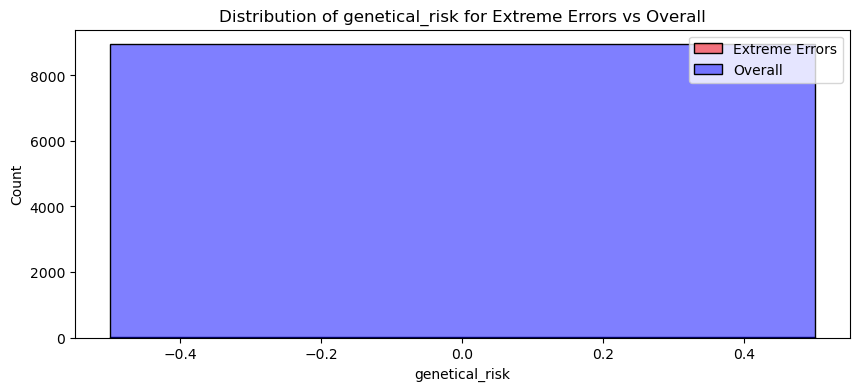

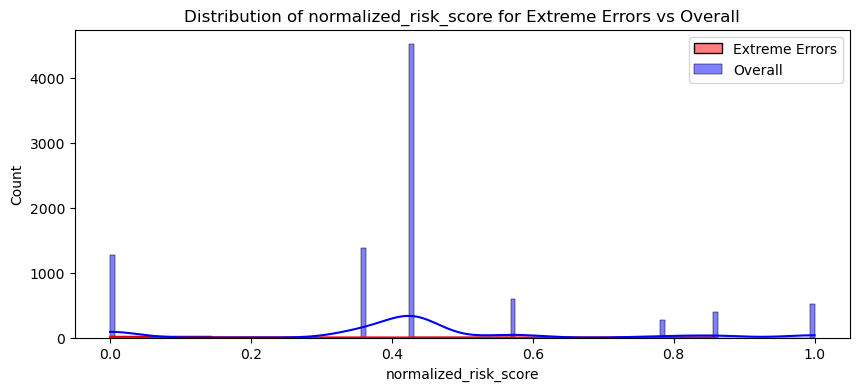

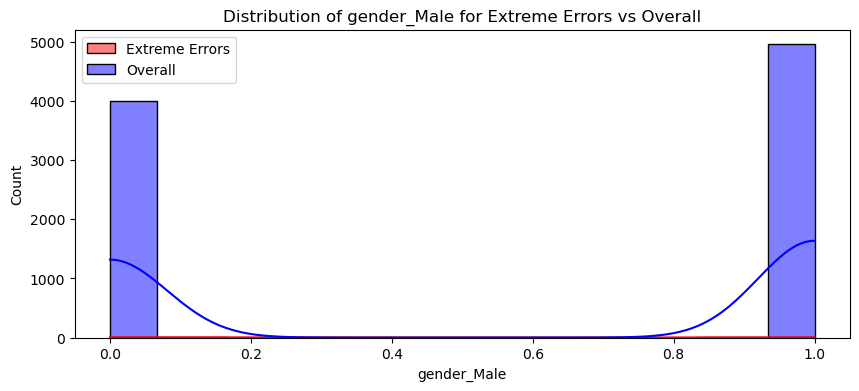

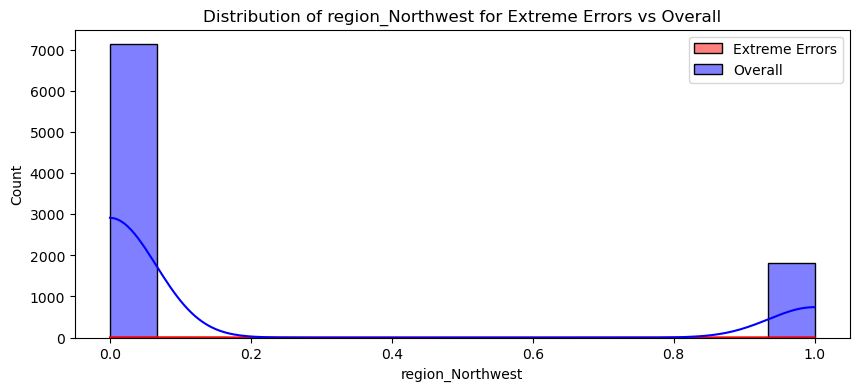

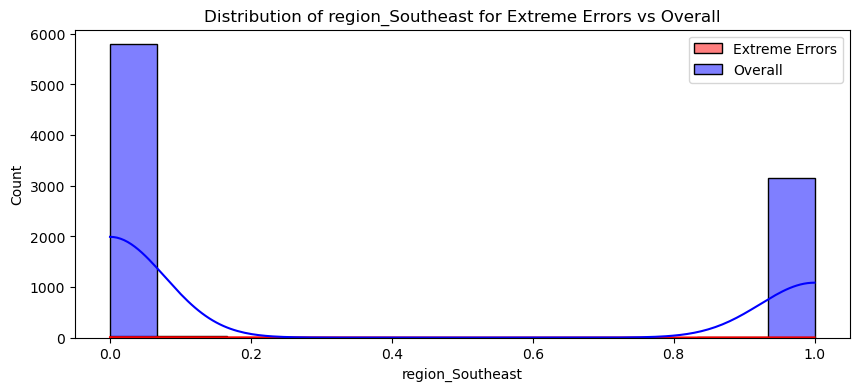

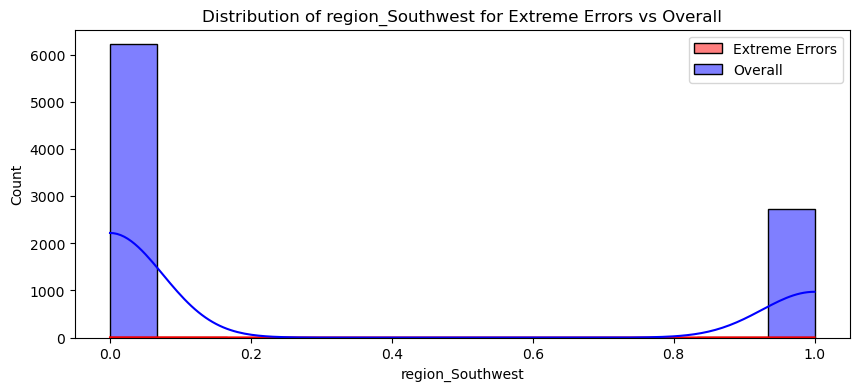

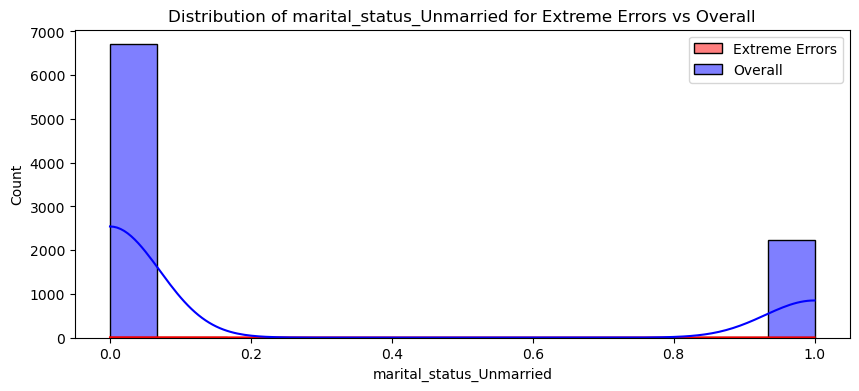

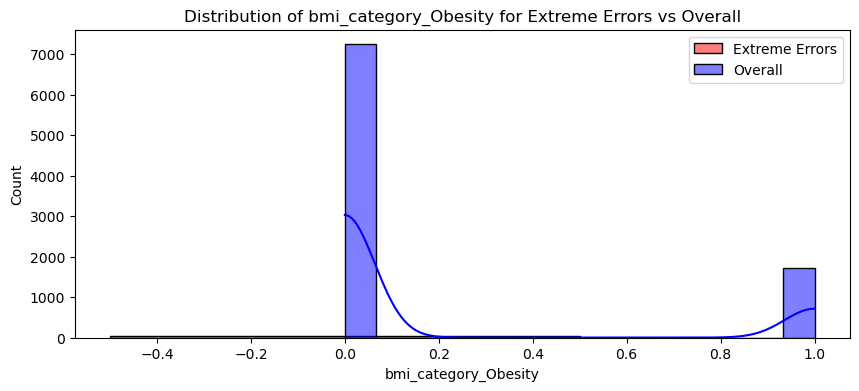

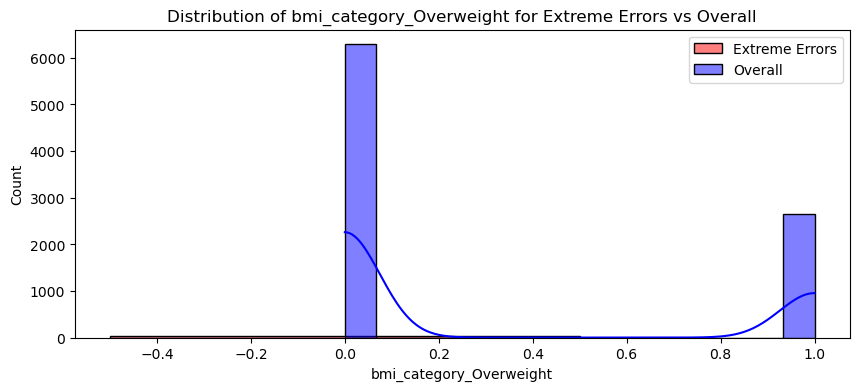

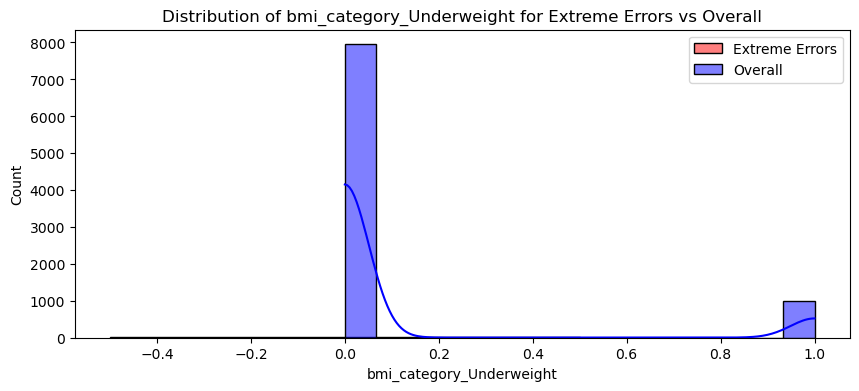

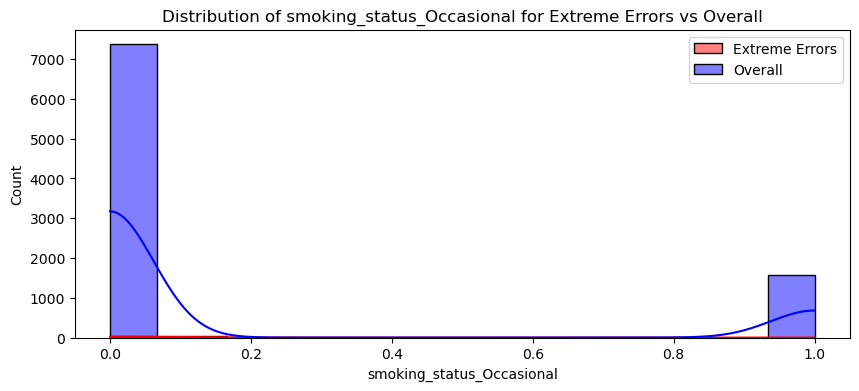

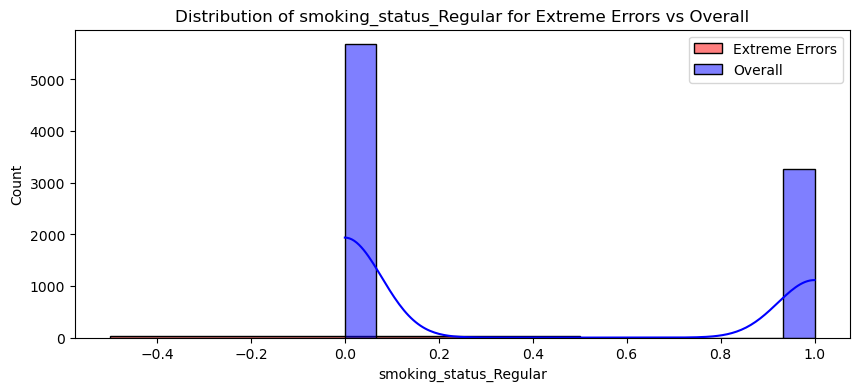

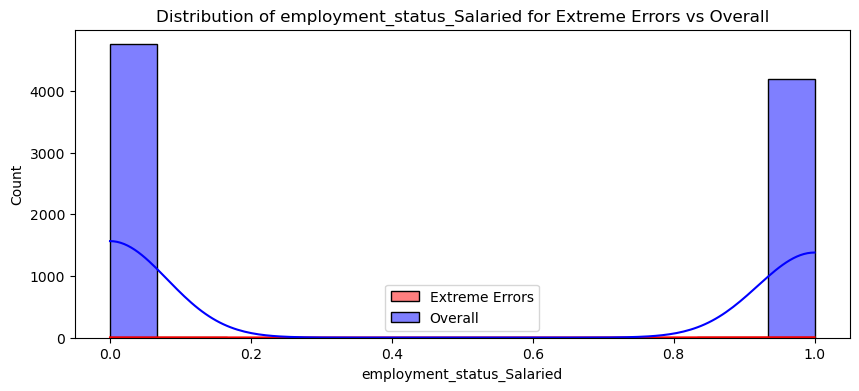

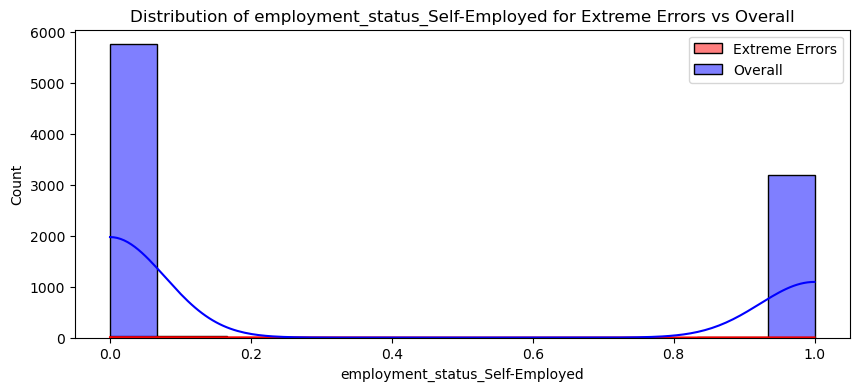

In [140]:
for feature in X_test.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(extreme_errors_df[feature], color='red', label='Extreme Errors', kde=True)
    sns.histplot(X_test[feature], color='blue', label='Overall', alpha=0.5, kde=True)
    plt.legend()
    plt.title(f'Distribution of {feature} for Extreme Errors vs Overall')
    plt.show()

In [141]:
##reverse scaling 

extreme_errors_df['income_level']=-1

In [142]:
df_reversed = pd.DataFrame()
df_reversed[cols_to_scale] = scaler.inverse_transform(extreme_errors_df[cols_to_scale])
df_reversed.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk
0,27.0,-3.0,-2.0,6.0,1.0,0.0
1,40.0,3.0,-2.0,9.0,1.0,0.0
2,41.0,3.0,-2.0,2.0,1.0,0.0
3,42.0,1.0,-2.0,9.0,1.0,0.0
4,28.0,3.0,-2.0,3.0,1.0,0.0


In [143]:
df_reversed.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk
count,29.000000,29.000000,29.0,29.000000,29.0,29.0
mean,36.586207,2.034483,-2.0,6.862069,1.0,0.0
std,6.811321,1.523219,0.0,7.619168,0.0,0.0
min,26.000000,-3.000000,-2.0,1.000000,1.0,0.0
25%,32.000000,1.000000,-2.0,3.000000,1.0,0.0
50%,37.000000,2.000000,-2.0,5.000000,1.0,0.0
75%,40.000000,3.000000,-2.0,9.000000,1.0,0.0
max,57.000000,4.000000,-2.0,39.000000,1.0,0.0


<Axes: xlabel='age', ylabel='Count'>

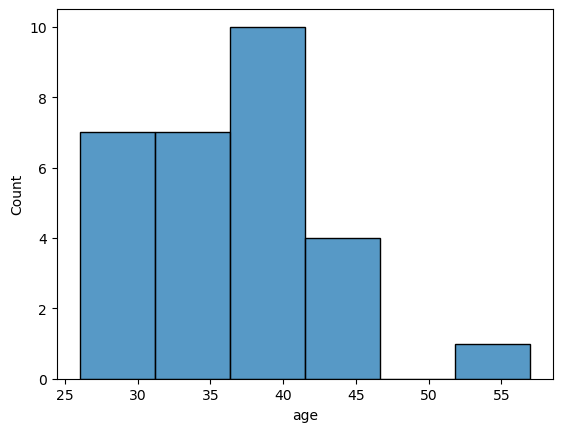

In [144]:
sns.histplot(df_reversed.age)

In [145]:
df_reversed['age'].quantile(0.95)

45.599999999999994

In [146]:
###something wrong with age of people where extreme error is higher for people with age 25 or less

In [147]:
### maybe need model segmentation

In [148]:
###This shows that majority of the extreme errors are coming from young age group (i.e. <25 years of age).I need to build a separate model for this segment

In [149]:

from joblib import dump
dump(best_model,"artifacts/model_rest.joblib")



['artifacts/model_rest.joblib']

In [150]:
scaler_with_columns={'scaler':scaler,

                     'cols_to_scale}':cols_to_scale}

dump(scaler_with_columns,"artifacts/scaler_rest.joblib")

['artifacts/scaler_rest.joblib']

In [ ]:
### Used XGBoost that was randomized search with best hyperparameters for rest of the population that is above 25